# Assignment8

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Divyashanmugapriyan/Dataset/main/car_data.csv")
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [4]:
df.isna().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [5]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

#Tasks, Part 1

1.Find the linear regression equation for mileage vs price

In [6]:
X=df[["Mileage"]]
y=df["Price"]

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [14]:
m=model.coef_
c=model.intercept_
print('The equation of Linear Regression is: y=',m,'x+',c)

The equation of Linear Regression is: y= [-0.20364911] x+ 25581.391535102055


2.Chart the original data and the equation on the chart.

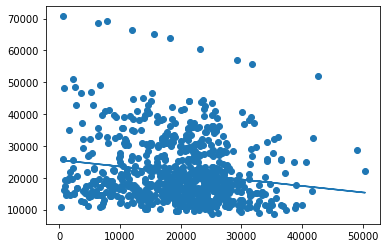

In [19]:
plt.scatter(X,y)
plt.plot(X,model.predict(X))

3.Find the equation's $R^2$ score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation

In [21]:
score=model.score(X,y)*100
score

1.9389425029912588

not a strong correlation

#Tasks, Part 2

1.Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

In [22]:
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

In [23]:
X=df[['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']]
Y=df['Price']

In [33]:
model.fit(X,Y)
m=model.coef_
c=model.intercept_
print('The equation of Linear Regression is : y=',m,'x+',c)

The equation of Linear Regression is : y= [-1.69747832e-01  3.79237893e+03 -7.87220732e+02 -1.54274585e+03
  6.28899715e+03 -1.99379528e+03  3.34936162e+03] x+ 6758.755143598106


2.Find the equation's R2 score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [35]:
score=model.score(X,y)
print(score)
print(score*100,"%")

0.4462643536728379
44.62643536728379 %


The model score is 0.44, which is less than 0.8, indicating the equation is not a good fit for the data

3.Find the combination of the factors that is the best predictor for price.

In [25]:
X1=df[['Mileage']]
X2=df[['Cylinder']]
X3=df[['Liter']]
X4=df[['Doors']]
X5=df[['Cruise']]
X6=df[['Sound']]
X7=df[['Leather']]
Y=df['Price']

In [26]:
model.fit(X,Y)
print('Score :',model.score(X,Y)*100)
model.fit(X1,Y)
print('Mileage Score :',model.score(X1,Y)*100)
model.fit(X2,Y)
print('Cylinder Score :',model.score(X2,Y)*100)
model.fit(X3,Y)
print('Liter Score :',model.score(X3,Y)*100)
model.fit(X4,Y)
print('Doors Score :',model.score(X4,Y)*100)
model.fit(X5,Y)
print('Cruise Score :',model.score(X5,Y)*100)
model.fit(X6,Y)
print('Sound Score :',model.score(X6,Y)*100)
model.fit(X7,Y)
print('Leather Score :',model.score(X7,Y)*100)

Score : 44.62643536728379
Mileage Score : 2.046344732348926
Cylinder Score : 32.385903759512246
Liter Score : 31.152674427904504
Doors Score : 1.9251466591467037
Cruise Score : 18.563300929692762
Sound Score : 1.5462387624189389
Leather Score : 2.4710851264124534


cylinder scores best

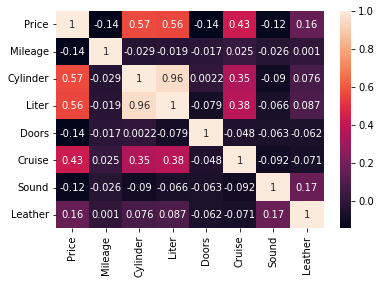

In [27]:
import seaborn as sns
heat=sns.heatmap(df.corr(),annot=True)
heat

#Tasks, Hard Mode

1.Research dummy variables in scikit-learn to see how to use the make, model, and body type.

In [28]:
df=pd.get_dummies(df,columns=["Make","Model","Type"])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 52 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Price              804 non-null    float64
 1   Mileage            804 non-null    int64  
 2   Trim               804 non-null    object 
 3   Cylinder           804 non-null    int64  
 4   Liter              804 non-null    float64
 5   Doors              804 non-null    int64  
 6   Cruise             804 non-null    int64  
 7   Sound              804 non-null    int64  
 8   Leather            804 non-null    int64  
 9   Make_Buick         804 non-null    uint8  
 10  Make_Cadillac      804 non-null    uint8  
 11  Make_Chevrolet     804 non-null    uint8  
 12  Make_Pontiac       804 non-null    uint8  
 13  Make_SAAB          804 non-null    uint8  
 14  Make_Saturn        804 non-null    uint8  
 15  Model_9-2X AWD     804 non-null    uint8  
 16  Model_9_3          804 non

#2.Find the best combination of factors to predict price.
From R2 score and correlation matrix, cylinder and liter are best combination of factors to predict price